## Step1) Preprocessing

##### 1. Bring out the data

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

##Step 1 ) Bring out data
wine_data = pd.DataFrame(load_wine().data)
y = pd.Series(load_wine().target)
wine_data['target'] = y
del y
shuffled_data = wine_data.sample(frac=1).reset_index(drop=True)

shuffled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,12.08,1.33,2.30,23.6,70.0,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625.0,1
1,12.82,3.37,2.30,19.5,88.0,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685.0,2
2,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0,0
3,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1
4,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0,2


##### 2. Get X data and y data and normalize

In [2]:
X_data = shuffled_data.drop(['target'], axis='columns')
y_data = shuffled_data['target']

#normalization of X_data
X_data = (X_data - X_data.min(axis=0))/(X_data.max(axis=0) - X_data.min(axis=0)) 

##### 3. Divide X data and y data into train and test data

In [3]:
X_test, y_test = np.array(X_data[0 : 17]), np.array(y_data[0 : 17])

X_train = np.delete(np.array(X_data), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],0)
y_train = np.delete(np.array(y_data), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],0)

##### 4. Recall : Algorithm

![image](./image/image1.png)

![image](./image/image2.png)

## Step2)  make S and D

##### 1. make class matrix

In [4]:
X_in_0 = X_train[y_train==0]
X_in_1 = X_train[y_train==1]
X_in_2 = X_train[y_train==2]

##### 2. make S

In [5]:
S = np.zeros((len(X_data.T),len(X_data.T)))

##### 3. make D

In [6]:
D = np.zeros((len(X_data.T),len(X_data.T)))

## Step3 ) Return distance matrix

##### 1. basic of function

In [7]:
def f(x):
    y = x*2+1
    return y

In [8]:
f(2)

5

##### 2. make our GMML functions

In [9]:
def Sqrt_Matrix(A):
    u, s, v_t = np.linalg.svd(A) 
    return np.dot(np.dot(u, np.diag(np.sqrt(s))), v_t)
        
def Return_A(S, D):
    both_ends = np.linalg.inv(Sqrt_Matrix(S))
    u, s, v_t = np.linalg.svd(np.dot(np.dot(Sqrt_Matrix(S), D), Sqrt_Matrix(S))) 
    return np.dot(np.dot(both_ends, np.dot(np.dot(u, np.diag(s**(1/2))), v_t)), both_ends)

##### (Exercise) make : Mahalanobis distance function
Hint) we need x, y, A variable

![image](./image/image3.png)

In [10]:
#form

def Mahala_metric():
    return 

## Step4) Apply to knn model

##### 1. Original Knn

In [11]:
k=5

In [12]:
y_hat_Euclidean = []
for i in range(len(X_test)):
    dist = np.sqrt(np.sum((X_train - X_test[i])**2, axis=1))
    indices = np.argsort(dist)[:k]
    y_near = list(y_train[indices])
    y_hat_Euclidean.append(np.argmax([y_near.count(0), y_near.count(1), y_near.count(2)]))
    
    
print(np.mean(y_hat_Euclidean == y_test))

1.0


##### 2. Knn with GMML

In [ ]:
y_hat_GMML=[]
for i in range(len(X_test)):
    dist = []
    for j in range(len(X_train)):    
        dist.append(float(Mahala_metric(Return_A(S, D), np.array(X_test)[i], np.array(X_train)[j])))
    indices = np.argsort(dist)[:k]
    y_near = list(y_train[indices])
    y_hat_GMML.append(np.argmax([y_near.count(0), y_near.count(1), y_near.count(2)]))
    
    
print(np.mean(y_hat_GMML == y_test))

#### 3. Compare with original and GMML for many k's

In [127]:
accuracy_GMML = []
accuracy_Euclidean = []
for k in range(2,10):
    
    y_hat_Euclidean = []
    for i in range(len(X_test)):
        dist = np.sqrt(np.sum((X_train - X_test[i])**2, axis=1))
        indices = np.argsort(dist)[:k]
        y_near = list(y_train[indices])
        y_hat_Euclidean.append(np.argmax([y_near.count(0), y_near.count(1), y_near.count(2)]))
    accuracy_Euclidean.append(np.mean(y_hat_Euclidean == y_test))
    
    y_hat_GMML=[]
    for i in range(len(X_test)):
        dist = []
        for j in range(len(X_train)):    
            dist.append(float(Mahala_metric(Return_A_t(S, D), np.array(X_test)[i], np.array(X_train)[j])))
        indices = np.argsort(dist)[:k]
        y_near = list(y_train[indices])
        y_hat_GMML.append(np.argmax([y_near.count(0), y_near.count(1), y_near.count(2)]))
    accuracy_GMML.append(np.mean(y_hat_GMML == y_test))

##### plot

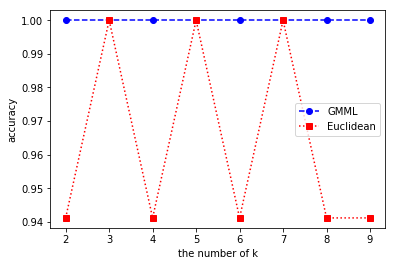

In [128]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(2,10)], accuracy_GMML, c='b', ls='--', marker='o', label='GMML')
plt.plot([i for i in range(2,10)], accuracy_Euclidean, c='r', ls=':', marker='s', label='Euclidean')
plt.xlabel("the number of k")
plt.ylabel("accuracy")
plt.legend()
